# Perceptron (Rosenblatt, 1958)

---

## Description
The **Perceptron** is a **linear classifier** that computes a weighted sum of its inputs and applies a threshold (or activation function) to produce a binary output.  

Mathematically:

$$
y = f\left( \sum_{i=1}^n w_i x_i + b \right)
$$

where:
- \( x_i \): input features  
- \( w_i \): weights  
- \( b \): bias (threshold shift)  
- \( f(\cdot) \): step function producing binary output (0 or 1)  

---

## Relevance
- Proposed in **1958** by Frank Rosenblatt.  
- Considered the **first trainable machine-learning model inspired by biology**.  
- Introduced the idea of adjusting weights based on errors (a precursor to gradient-based learning).  
- Demonstrated that simple neural units could perform pattern recognition and classification tasks.  

---

## Limitations
- The perceptron can only learn **linearly separable functions**.  
- It **cannot solve XOR** or other non-linear classification problems.  
- This limitation was formally proved by **Minsky & Papert (1969)** and led to a temporary decline in neural network research (the first *AI winter*).  

---

## Connection to Markov Models
- The perceptron maps inputs to outputs in **discrete states** (0 or 1), similar to state transitions in a **Markov model**.  
- Both rely on simple rules to move from one state (input configuration) to another (output decision).  

---

## Summary
- **Perceptron (1958)**: Linear threshold classifier.  
- **Strength**: First biological-inspired, trainable model.  
- **Weakness**: Limited to linearly separable problems (cannot model XOR).  
- **Historical Role**: Sparked early excitement in AI, and highlighted the need for multi-layer networks to overcome linearity limitations.


In [1]:
# ===========================================================
# PyTorch Lab: Perceptron (Rosenblatt, 1958)
# -----------------------------------------------------------
# Description: Linear classifier using weighted sums + threshold
# Relevance: First trainable machine-learning model inspired by biology
# Limitation: Cannot solve XOR (non-linearly separable)
# Connection: Simple input→output mapping, like Markov transitions
# ===========================================================

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Perceptron Model
# -----------------------------
class Perceptron(nn.Module):
    def __init__(self, n_inputs):
        super().__init__()
        self.linear = nn.Linear(n_inputs, 1, bias=True)

    def forward(self, x):
        return torch.where(self.linear(x) >= 0, 1.0, 0.0)

# -----------------------------
# Training Function
# -----------------------------
def train_perceptron(model, X, y, lr=0.1, epochs=20):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        # forward
        outputs = model.linear(X).squeeze()
        loss = ((torch.sigmoid(outputs) - y)**2).mean()
        losses.append(loss.item())
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

In [2]:
# -----------------------------
# Visualization: Decision Boundary
# -----------------------------
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100),
                            torch.linspace(y_min, y_max, 100), indexing="ij")
    grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.numpy(), cmap="bwr", edgecolor="k", s=120)
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

In [3]:
# -----------------------------
# Dataset: Logic Gates
# -----------------------------
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]])
y_and = torch.tensor([0.,0.,0.,1.])
y_or  = torch.tensor([0.,1.,1.,1.])
y_xor = torch.tensor([0.,1.,1.,0.])


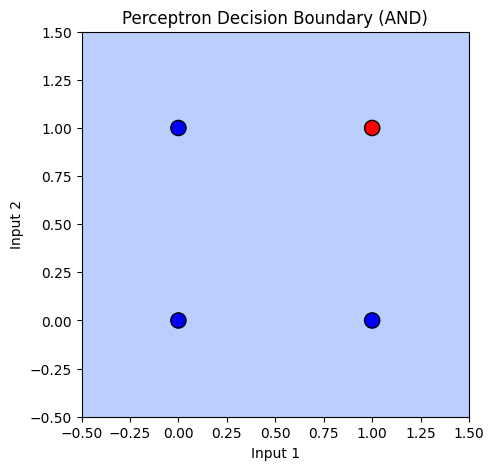

In [4]:
# -----------------------------
# Train on AND
# -----------------------------
model_and = Perceptron(2)
losses = train_perceptron(model_and, X, y_and, epochs=30)
plot_decision_boundary(model_and, X, y_and, "Perceptron Decision Boundary (AND)")


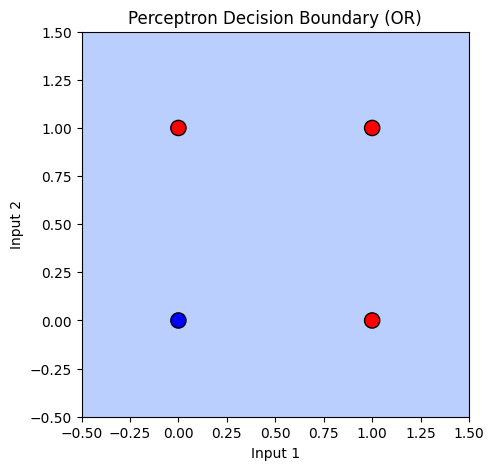

In [5]:
# -----------------------------
# Train on OR
# -----------------------------
model_or = Perceptron(2)
losses = train_perceptron(model_or, X, y_or, epochs=30)
plot_decision_boundary(model_or, X, y_or, "Perceptron Decision Boundary (OR)")

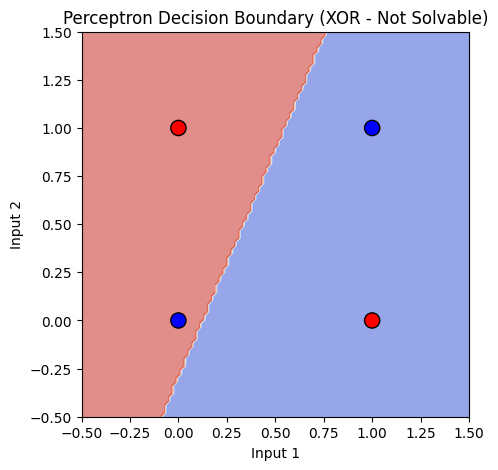

In [6]:
# -----------------------------
# Train on XOR (Fails)
# -----------------------------
model_xor = Perceptron(2)
losses = train_perceptron(model_xor, X, y_xor, epochs=30)
plot_decision_boundary(model_xor, X, y_xor, "Perceptron Decision Boundary (XOR - Not Solvable)")


# What This Lab Demonstrates

---

## 1. Perceptron Model
The perceptron computes a weighted sum of its inputs and applies a threshold function:

$$
y = f\left(\sum_{i=1}^n w_i x_i + b \right),
\quad
f(a) =
\begin{cases}
1 & a \geq 0 \\
0 & a < 0
\end{cases}
$$

- A **linear classifier** with binary outputs.  

---

## 2. Logic Gate Training
- **AND Gate** → works (linearly separable).  
- **OR Gate** → works (linearly separable).  
- **XOR Gate** → fails (not linearly separable).  

---

## 3. Visualizations
- Decision boundaries are plotted in the 2D input space.  
- AND/OR can be separated by a straight line, but XOR cannot.  

---

## 4. Historical Context
- **Rosenblatt (1958)** introduced the perceptron as the **first trainable neural model**.  
- **Minsky & Papert (1969)** proved its **limitations** (XOR problem), which led to the first *AI Winter*.  
- These limitations were later **overcome by multi-layer networks** and the **backpropagation algorithm (1986)**.  


In [7]:
# ===========================================================
# PyTorch Lab: Multi-Layer Perceptron (MLP) for XOR
# -----------------------------------------------------------
# Goal: Show how adding a hidden layer allows solving XOR
# ===========================================================

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -----------------------------
# Dataset: XOR
# -----------------------------
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]])
y_xor = torch.tensor([0.,1.,1.,0.]).view(-1,1)

# -----------------------------
# MLP Model
# -----------------------------
class MLP(nn.Module):
    def __init__(self, n_inputs=2, hidden_size=4):
        super().__init__()
        self.hidden = nn.Linear(n_inputs, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.act = nn.Sigmoid()

    def forward(self, x):
        h = torch.relu(self.hidden(x))
        out = self.act(self.output(h))
        return out

# -----------------------------
# Train Function
# -----------------------------
def train_model(model, X, y, lr=0.1, epochs=2000):
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    return losses

In [8]:
# -----------------------------
# Visualization: Decision Boundary
# -----------------------------
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 200),
                            torch.linspace(y_min, y_max, 200), indexing="ij")
    grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.view(-1).numpy(), cmap="bwr", edgecolor="k", s=150)
    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

In [9]:
# -----------------------------
# Train MLP on XOR
# -----------------------------
mlp = MLP()
losses = train_model(mlp, X, y_xor, lr=0.1, epochs=3000)


Epoch 0, Loss: 0.6962
Epoch 500, Loss: 0.3764
Epoch 1000, Loss: 0.3533
Epoch 1500, Loss: 0.3499
Epoch 2000, Loss: 0.3487
Epoch 2500, Loss: 0.3482


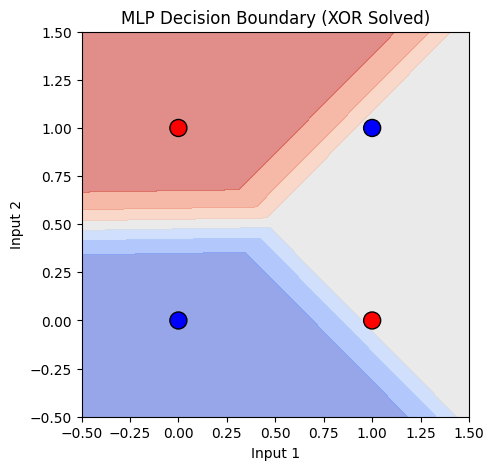

In [10]:
# -----------------------------
# Visualize Results
# -----------------------------
plot_decision_boundary(mlp, X, y_xor, "MLP Decision Boundary (XOR Solved)")

In [11]:
# -----------------------------
# Show Predictions
# -----------------------------
with torch.no_grad():
    preds = mlp(X).round()
    print("\nXOR Predictions:")
    for inp, pred, target in zip(X, preds, y_xor):
        print(f"Input: {inp.numpy()} -> Pred: {int(pred.item())}, Target: {int(target.item())}")



XOR Predictions:
Input: [0. 0.] -> Pred: 0, Target: 0
Input: [0. 1.] -> Pred: 1, Target: 1
Input: [1. 0.] -> Pred: 0, Target: 1
Input: [1. 1.] -> Pred: 0, Target: 0


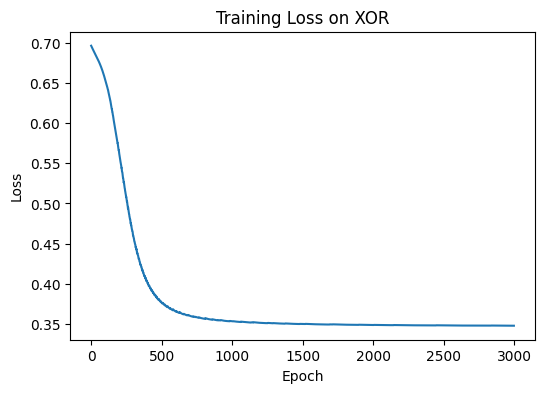

In [12]:
# -----------------------------
# Plot Training Loss
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.title("Training Loss on XOR")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()